<a href="https://colab.research.google.com/github/khushichhajed/letsgrowmore/blob/main/lgm_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LETS GROW MORE**

**DATA SCIENCE INTERN**

**NAME - KHUSHI CHHAJED**

**Task-4 : Devlop a nuetral network that can read handwriting**

*importing libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

**Loading dataset**

In [ ]:
mnist= tf.keras.datasets.mnist

**Dividing the images and their outputs into x_train and x_test sets**

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


*Cheking the data set images, which needed to be identified by the neural* *network*

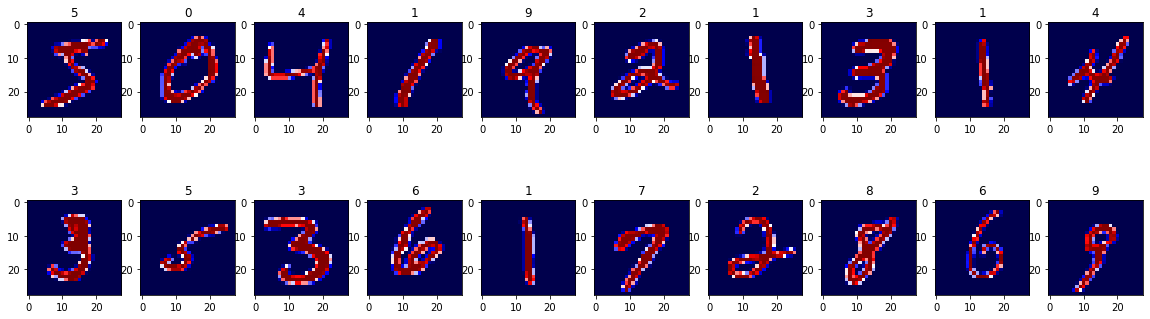

In [ ]:
fig=plt.figure(figsize=(20,6))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]),cmap='seismic')
  ax.set_title(y_train[i])

In [ ]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [ ]:
xtrain = x_train/255.0
xtest = x_test/255.0

In [ ]:
mod = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(30,30)),
                                    tf.keras.layers.Dense(130, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 dense_2 (Dense)             (None, 130)               117130    
                                                                 
 dense_3 (Dense)             (None, 10)                1310      
                                                                 
Total params: 118,440
Trainable params: 118,440
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mod.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
mod.fit(xtrain,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9271
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1145 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0776 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0457 - accuracy: 0.9859


**98% accuracy achieved in 5 iteration**

In [ ]:
mod.fit(xtrain,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0068 - accuracy: 0.9979
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0064 - accuracy: 0.9978
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0058 - accuracy: 0.9981
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9990
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0071 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.002

99% accuracy acieved in 9 iterations

In [ ]:
print(mod.evaluate(x_test,y_test))

313/313 [==============================] - 1s 1ms/step - loss: 25.8280 - accuracy: 0.9791
[25.827966690063477, 0.9790999889373779]


**97 % of total accuracy of our neural network has been achieved**

In [ ]:
history=mod.fit(x_train,y_train,epochs=10,batch_size=20,validation_split=0.1)

Epoch 1/10
2700/2700 [==============================] - 8s 3ms/step - loss: 4.9866 - accuracy: 0.9921 - val_loss: 1.5920 - val_accuracy: 0.9967
Epoch 2/10
2700/2700 [==============================] - 7s 3ms/step - loss: 2.3344 - accuracy: 0.9947 - val_loss: 1.8458 - val_accuracy: 0.9947
Epoch 3/10
2700/2700 [==============================] - 7s 3ms/step - loss: 2.4130 - accuracy: 0.9950 - val_loss: 1.6833 - val_accuracy: 0.9950
Epoch 4/10
2700/2700 [==============================] - 7s 3ms/step - loss: 2.1923 - accuracy: 0.9952 - val_loss: 3.2139 - val_accuracy: 0.9955
Epoch 5/10
2700/2700 [==============================] - 7s 2ms/step - loss: 1.8308 - accuracy: 0.9954 - val_loss: 3.4087 - val_accuracy: 0.9932
Epoch 6/10
2700/2700 [==============================] - 7s 3ms/step - loss: 2.4884 - accuracy: 0.9950 - val_loss: 3.4824 - val_accuracy: 0.9935
Epoch 7/10
2700/2700 [==============================] - 7s 3ms/step - loss: 2.1274 - accuracy: 0.9954 - val_loss: 5.7220 - val_accuracy:

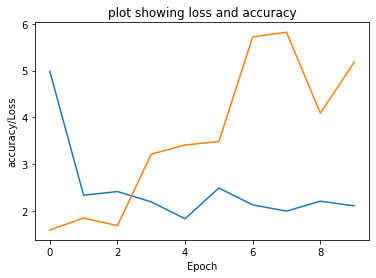

In [ ]:
plt.title("plot showing loss and accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()

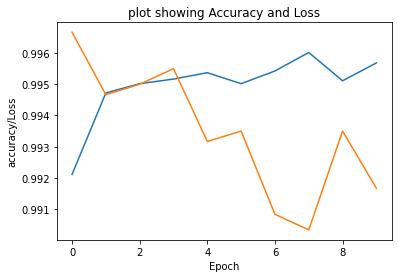

In [ ]:
plt.title("plot showing Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("accuracy/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

**model testing**

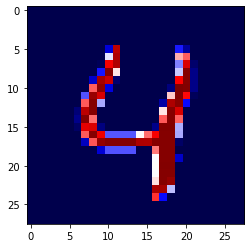

In [ ]:
plt.imshow(np.squeeze(x_test[4]),cmap="seismic")

In [ ]:
prediction=mod.predict(x_test)
print(np.argmax(prediction[4]))

4


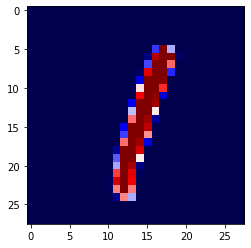

In [ ]:
plt.imshow(np.squeeze(x_test[5]),cmap="seismic")

In [ ]:
prediction=mod.predict(x_test)
print(np.argmax(prediction[5]))

1
